In [1]:
import pandas as pd
df=pd.read_csv('training.log',sep=',')
df.head()

,epoch,loss,mrcnn_bbox_loss,mrcnn_class_loss,mrcnn_mask_loss,rpn_bbox_loss,rpn_class_loss,val_loss,val_mrcnn_bbox_loss,val_mrcnn_class_loss,val_mrcnn_mask_loss,val_rpn_bbox_loss,val_rpn_class_loss
0,0,0.322522,0.034635,0.019803,0.215751,0.050737,0.001592,0.250342,0.021709,0.011627,0.181251,0.034961,0.000789
1,1,0.318964,0.033908,0.019997,0.215259,0.048261,0.001525,0.248954,0.021669,0.011806,0.179449,0.035219,0.000797
2,2,0.334256,0.033690,0.019451,0.218052,0.060856,0.002193,0.248826,0.021998,0.011582,0.179569,0.034988,0.000674
3,3,0.304841,0.032280,0.018405,0.206871,0.046150,0.001120,0.224550,0.016732,0.010930,0.161057,0.035171,0.000645
4,4,0.343865,0.037920,0.020561,0.220698,0.061889,0.002782,0.243113,0.020947,0.011219,0.182093,0.028126,0.000713


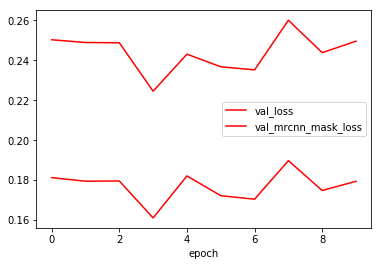

In [7]:
import matplotlib.pyplot as plt
# df.plot(kind="line",x='epoch',y=['loss','val_loss'])
im=df.plot(kind="line",x='epoch',y=['val_loss','val_mrcnn_mask_loss'],color='red')
fig = im.get_figure()
fig.savefig("output.png")

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import SimpleITK as sitk
import copy
import os
import SimpleITK as sitk
#ct_scans = sitk.GetArrayFromImage(sitk.ReadImage("training_001_ct.mhd", sitk.sitkFloat32))patient0001_2CH_ED
def save_itk(image, filename):
    im = sitk.GetImageFromArray(image, isVector=False)
    sitk.WriteImage(im, filename, False)

def separateSegmentation(fileName):
    
    mask1_dir=fileName.replace('.mhd','1.mhd')
    mask2_dir=fileName.replace('.mhd','2.mhd')
    mask4_dir=fileName.replace('.mhd','4.mhd')
    mask1=sitk.GetArrayFromImage(sitk.ReadImage(mask1_dir, sitk.sitkFloat32))
    mask2=sitk.GetArrayFromImage(sitk.ReadImage(mask2_dir, sitk.sitkFloat32))
    mask4=mask1+mask2
    for a in range(0,mask4.shape[0]):
        for b in range(0,mask4.shape[1]):
            if mask4[a][b]==2:
                mask4[a][b]=1

    save_itk(mask4,mask4_dir)

rootdir='/floyd/home/camus_separated'
imgs=[]
segs=[]
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        name=os.path.join(subdir, file)
        print(name)
        if name.endswith("_gt.mhd"):
            imgs.append(name)
            separateSegmentation(name)
            print(name)
print("end!")

/floyd/home/camus_separated/patient0213/patient0213_2CH_ES_gt2.mhd
/floyd/home/camus_separated/patient0213/patient0213_2CH_ES_gt1.zraw
/floyd/home/camus_separated/patient0213/patient0213_2CH_ED_gt.raw
/floyd/home/camus_separated/patient0213/patient0213_4CH_ES_gt.mhd
/floyd/home/camus_separated/patient0213/patient0213_4CH_ES_gt.mhd
/floyd/home/camus_separated/patient0213/patient0213_2CH_ED_gt2.zraw
/floyd/home/camus_separated/patient0213/patient0213_4CH_ED.mhd
/floyd/home/camus_separated/patient0213/patient0213_4CH_ES_gt1.zraw
/floyd/home/camus_separated/patient0213/Info_4CH.cfg
/floyd/home/camus_separated/patient0213/patient0213_2CH_sequence.mhd
/floyd/home/camus_separated/patient0213/patient0213_4CH_sequence.raw
/floyd/home/camus_separated/patient0213/patient0213_4CH_ES_gt2.zraw
/floyd/home/camus_separated/patient0213/patient0213_2CH_ES_gt3.mhd
/floyd/home/camus_separated/patient0213/patient0213_2CH_ED_gt3.mhd
/floyd/home/camus_separated/patient0213/patient0213_4CH_ED_gt.mhd
/floyd/ho